In [17]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO
from sklearn.cluster import KMeans

# link a la imagen
link = 'https://static.wikia.nocookie.net/dreamworks/images/3/39/Shrek.jpg/revision/latest?cb=20091123110328'

In [19]:
#obtenemos la imagen
response = requests.get(link)
img = Image.open(BytesIO(response.content))

In [23]:
# cada pixel son 3 numeros
# image contiene una tupla de (460, 300, 3) para una imagen de 460x300
# pixels contiene una tupla de (138000, 3)
image = mpimg.imread(BytesIO(response.content),'jpg')
w, h, d = tuple(image.shape)
pixels = np.reshape(image, (w * h , d))

In [ ]:
# n_colors será la cantidad de clusters
n_colors = 5
model = KMeans( n_clusters=n_colors, random_state=42).fit(pixels)
palette = np.uint8( model.cluster_centers_ )

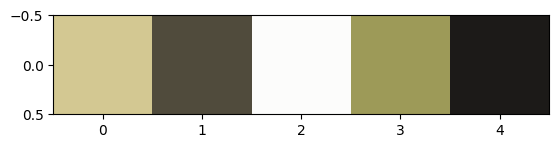

In [26]:
plt.imshow([palette])
plt.show()

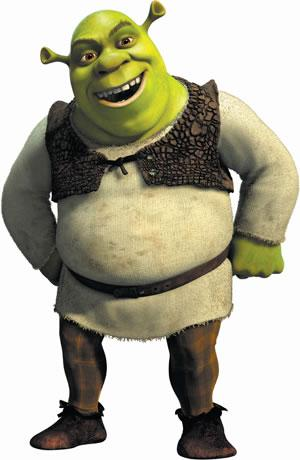

In [27]:
img